# Project Info
**Dataset:** https://www.kaggle.com/datasets/harbhajansingh21/bike-sharing-dataset/data

**Problem type:** Regression

**Target variable:** Hourly bike rental count

**Why?** We will predict the total number of hourly bike rentals from Capital Bikeshare in Washington D.C. in the years 2011 and 2012 based on relevant features in the dataset. Our regression model will help Capital Bikeshare plan how many bikes they should anticipate renting given various environmental factors that influence the volume of bike rentals.

## Load the data and packages

In [209]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plot
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

bikes = pd.read_csv("hour.csv")
bikes.drop("dteday", axis = 1)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Explore the datatset

1. Check the types of each column

In [210]:
# There is only one column that is not an integer or a float, and it is the date column (type object)
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


2. Check the number of instances and columns

In [211]:
# The dataset has 17,379 instances and 17 columns
bikes.shape

(17379, 17)

3. Check for null values

In [212]:
# There are no null values in the dataset - yay!
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Visualize the data distribution

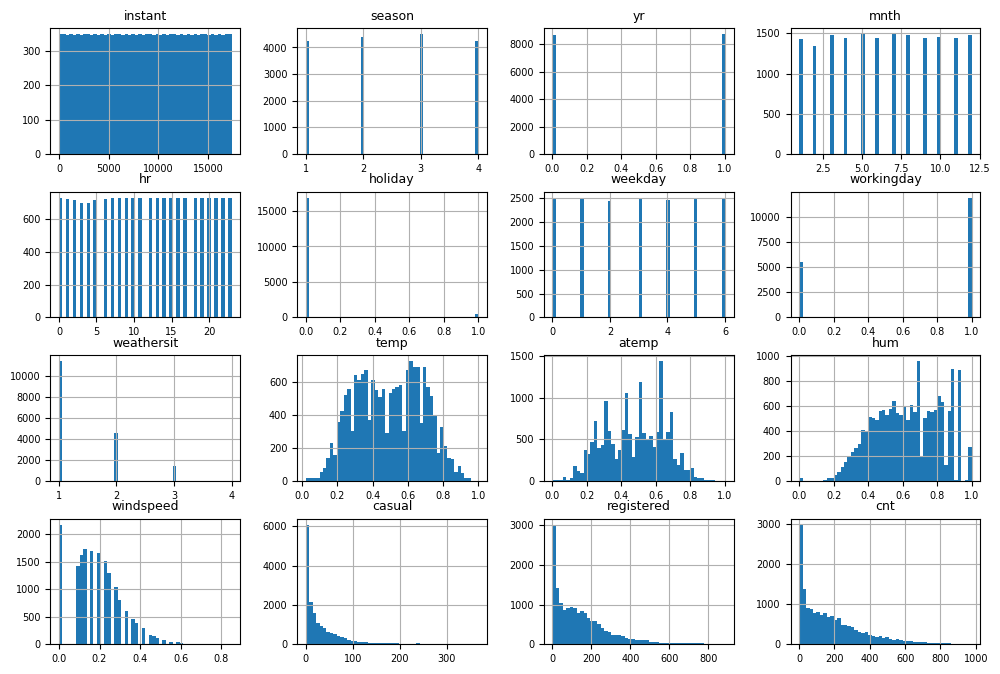

In [213]:
plot.rc('font', size = 9)
plot.rc('axes', labelsize = 9, titlesize = 9)
plot.rc('legend', fontsize = 9)
plot.rc('xtick', labelsize = 7)
plot.rc('ytick', labelsize = 7)

bikes.hist(bins = 50, figsize = (12, 8))
plot.show()

## Compute correlation matrix

In [214]:
correlation_matrix = bikes.corr(numeric_only = True)
correlation_matrix["cnt"].sort_values(ascending = False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

## Display scatter matrix

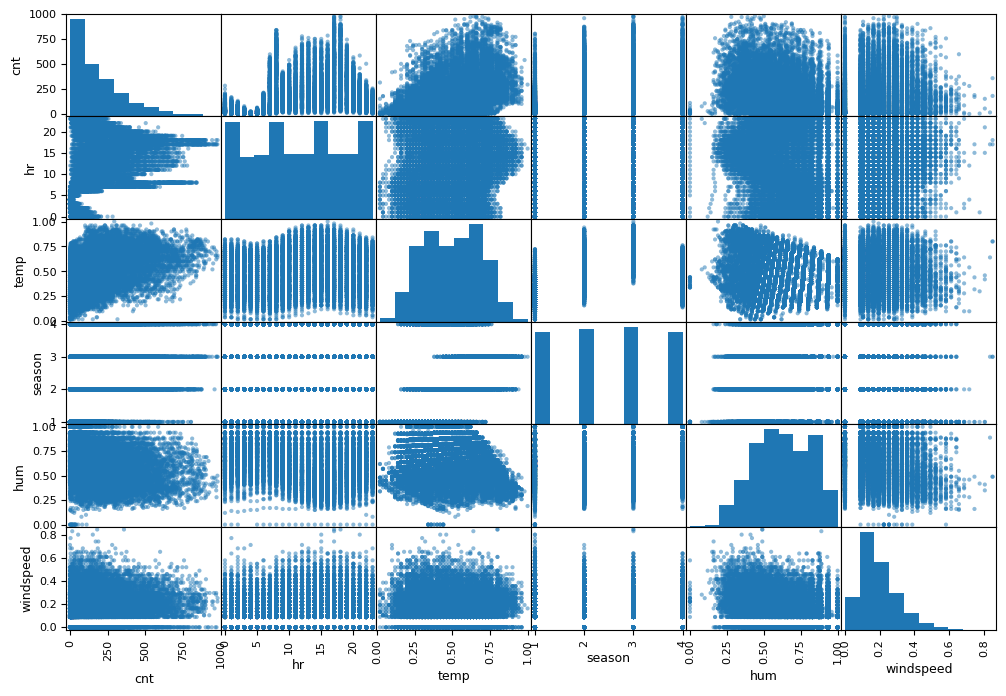

In [215]:
attributes = ["cnt", "hr", "temp", "season", "hum", "windspeed"]
scatter_matrix(bikes[attributes], figsize = (12, 8))
plot.show()

## Split the dataset
We will use stratified split to get an equal distribution of STRATIFIED VARIABLE HERE

In [216]:
strat_train_set, strat_test_set = train_test_split(
    bikes, test_size=0.2, stratify=bikes["weathersit"], random_state=42)

# Separate obtain housing labels (cnt)
train_labels = strat_train_set["cnt"].copy()
test_labels = strat_test_set["cnt"].copy()

# Remove the cnt column from test and training
strat_train_set.drop("cnt", axis=1, inplace=True)
strat_test_set.drop("cnt", axis=1, inplace=True)

print(f"Training set: {len(strat_train_set)}")
print(f"Test set: {len(strat_test_set)}\n")

print("Values for each category of the weathersit column in the test set:")
print(f"{bikes['weathersit'].value_counts()}\n")

# Confirm stratifying the data worked
print("Proportions for each category of the weathersit column in the test set:")
print(f"{strat_test_set['weathersit'].value_counts() / len(strat_test_set)}\n")

# Check if workingday is split roughly the same in the training and the test set
print("Proportions for weekends and weekdays (excluding holidays) in training set:")
print(f"{strat_train_set['workingday'].value_counts() / len(strat_train_set)}\n")
print("Proportions for weekends and weekdays (excluding holidays) in test set:")
print(f"{strat_test_set['workingday'].value_counts() / len(strat_test_set)}\n")

Training set: 13903
Test set: 3476

Values for each category of the weathersit column in the test set:
weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

Proportions for each category of the weathersit column in the test set:
weathersit
1    0.656789
2    0.261507
3    0.081703
Name: count, dtype: float64

Proportions for weekends and weekdays (excluding holidays) in training set:
workingday
1    0.686399
0    0.313601
Name: count, dtype: float64

Proportions for weekends and weekdays (excluding holidays) in test set:
workingday
1    0.668009
0    0.331991
Name: count, dtype: float64



## Preprocessing (on the training set)

1. Remove unnecessary columns

In [217]:
strat_train_set.drop(["instant", "dteday", "casual", "registered"], axis = 1, inplace = True) 
strat_train_set

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
3519,2,0,5,13,0,2,1,1,0.90,0.8333,0.39,0.1642
361,1,0,1,13,0,0,0,1,0.26,0.2273,0.35,0.2985
8217,4,0,12,1,0,3,1,1,0.26,0.3030,0.75,0.0000
16506,4,1,11,12,0,0,0,2,0.26,0.2576,0.41,0.2239
14575,3,1,9,12,0,2,1,1,0.76,0.7273,0.70,0.2836
...,...,...,...,...,...,...,...,...,...,...,...,...
16758,4,1,12,1,0,4,1,1,0.26,0.2424,0.48,0.2836
1581,1,0,3,9,0,5,1,2,0.30,0.2879,0.61,0.2836
14449,3,1,8,6,0,4,1,1,0.60,0.5606,0.83,0.1642
13095,3,1,7,20,1,3,0,1,0.86,0.8030,0.47,0.2239


2. Scale data if necessary - not necessary because the data is already normalized

3. Perform one hot encoding on categorical columns - we don't have any categorical variables, but we will do one hot encoding on the weather situation variable

In [218]:
# One hot encode the "weathersit" column because the column's numerical values should not be ordinal
one_hot_encoder = OneHotEncoder(sparse_output = False)
one_hot_encoded_train = one_hot_encoder.fit_transform(strat_train_set[["weathersit"]])
one_hot_encoded_columns = pd.DataFrame(one_hot_encoded_train, columns = one_hot_encoder.get_feature_names_out(["weathersit"]),
                                        index = strat_train_set.index)
# Add the encoded columns to the existing dataset
strat_train_set = pd.concat([strat_train_set.drop(columns = ["weathersit"]), one_hot_encoded_columns], axis = 1)
strat_train_set

,season,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,weathersit_1,weathersit_2,weathersit_3,weathersit_4
3519,2,0,5,13,0,2,1,0.90,0.8333,0.39,0.1642,1.0,0.0,0.0,0.0
361,1,0,1,13,0,0,0,0.26,0.2273,0.35,0.2985,1.0,0.0,0.0,0.0
8217,4,0,12,1,0,3,1,0.26,0.3030,0.75,0.0000,1.0,0.0,0.0,0.0
16506,4,1,11,12,0,0,0,0.26,0.2576,0.41,0.2239,0.0,1.0,0.0,0.0
14575,3,1,9,12,0,2,1,0.76,0.7273,0.70,0.2836,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16758,4,1,12,1,0,4,1,0.26,0.2424,0.48,0.2836,1.0,0.0,0.0,0.0
1581,1,0,3,9,0,5,1,0.30,0.2879,0.61,0.2836,0.0,1.0,0.0,0.0
14449,3,1,8,6,0,4,1,0.60,0.5606,0.83,0.1642,1.0,0.0,0.0,0.0
13095,3,1,7,20,1,3,0,0.86,0.8030,0.47,0.2239,1.0,0.0,0.0,0.0


4. Perform cyclical encoding on the month, season, and weekday

&nbsp; &nbsp; &nbsp; &nbsp; Weekday

In [219]:
# Circular encoding function
def circular_transform(X, max_value):
    X = np.asarray(X).flatten()
    sin_vals = np.sin(2 * np.pi * X / max_value)
    cos_vals = np.cos(2 * np.pi * X / max_value)
    return np.vstack([sin_vals, cos_vals]).T

# Apply circular encoding
max_value = 7
encoded_days = circular_transform(strat_train_set["weekday"].values, max_value)

# Add the encoded values back to the DataFrame
strat_train_set["weekday_sin"] = encoded_days[:, 0]
strat_train_set["weekday_cos"] = encoded_days[:, 1]

&nbsp; &nbsp; &nbsp; &nbsp; Month

In [220]:
# Apply circular encoding
max_value = 12
encoded_months = circular_transform(strat_train_set["mnth"].values, max_value)

# Add the encoded values back to the DataFrame
strat_train_set["mnth_sin"] = encoded_months[:, 0]
strat_train_set["mnth_cos"] = encoded_months[:, 1]

&nbsp; &nbsp; &nbsp; &nbsp; Season

In [221]:
# Apply circular encoding
max_value = 4
encoded_seasons = circular_transform(strat_train_set["season"].values, max_value)

# Add the encoded values back to the DataFrame
strat_train_set["season_sin"] = encoded_seasons[:, 0]
strat_train_set["season_cos"] = encoded_seasons[:, 1]

5. Drop the columns that were converted to cyclical

In [222]:
strat_train_set.drop(["weekday", "mnth", "season"], axis = 1, inplace = True)
strat_train_set

,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,weathersit_1,weathersit_2,weathersit_3,weathersit_4,weekday_sin,weekday_cos,mnth_sin,mnth_cos,season_sin,season_cos
3519,0,13,0,1,0.90,0.8333,0.39,0.1642,1.0,0.0,0.0,0.0,0.974928,-0.222521,5.000000e-01,-8.660254e-01,1.224647e-16,-1.000000e+00
361,0,13,0,0,0.26,0.2273,0.35,0.2985,1.0,0.0,0.0,0.0,0.000000,1.000000,5.000000e-01,8.660254e-01,1.000000e+00,6.123234e-17
8217,0,1,0,1,0.26,0.3030,0.75,0.0000,1.0,0.0,0.0,0.0,0.433884,-0.900969,-2.449294e-16,1.000000e+00,-2.449294e-16,1.000000e+00
16506,1,12,0,0,0.26,0.2576,0.41,0.2239,0.0,1.0,0.0,0.0,0.000000,1.000000,-5.000000e-01,8.660254e-01,-2.449294e-16,1.000000e+00
14575,1,12,0,1,0.76,0.7273,0.70,0.2836,1.0,0.0,0.0,0.0,0.974928,-0.222521,-1.000000e+00,-1.836970e-16,-1.000000e+00,-1.836970e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16758,1,1,0,1,0.26,0.2424,0.48,0.2836,1.0,0.0,0.0,0.0,-0.433884,-0.900969,-2.449294e-16,1.000000e+00,-2.449294e-16,1.000000e+00
1581,0,9,0,1,0.30,0.2879,0.61,0.2836,0.0,1.0,0.0,0.0,-0.974928,-0.222521,1.000000e+00,6.123234e-17,1.000000e+00,6.123234e-17
14449,1,6,0,1,0.60,0.5606,0.83,0.1642,1.0,0.0,0.0,0.0,-0.433884,-0.900969,-8.660254e-01,-5.000000e-01,-1.000000e+00,-1.836970e-16
13095,1,20,1,0,0.86,0.8030,0.47,0.2239,1.0,0.0,0.0,0.0,0.433884,-0.900969,-5.000000e-01,-8.660254e-01,-1.000000e+00,-1.836970e-16


6. Recompute the correlation matrix to see if steps 3 and 4 made a difference

In [223]:
# Make a copy of the training data to add the "cnt" column back in for the new correlation matrix
train_with_cnt = strat_train_set.copy()
train_with_cnt["cnt"] = train_labels

# Combine the effect of the sin and cosine values to calculate the magnitude of the cyclical features
train_with_cnt["weekday_mag"] = np.sqrt(train_with_cnt["weekday_sin"]**2 + train_with_cnt["weekday_cos"]**2)
train_with_cnt["month_mag"] = np.sqrt(train_with_cnt["mnth_sin"]**2 + train_with_cnt["mnth_cos"]**2)
train_with_cnt["season_mag"] = np.sqrt(train_with_cnt["season_sin"]**2 + train_with_cnt["season_cos"]**2)

correlation_matrix = train_with_cnt.corr(numeric_only = True)
correlation_matrix["cnt"].sort_values(ascending = False)

cnt             1.000000
temp            0.402714
atemp           0.397918
hr              0.390958
yr              0.250483
weathersit_1    0.117576
windspeed       0.088774
workingday      0.034359
weekday_mag    -0.005597
weathersit_4   -0.009258
weekday_sin    -0.015843
season_cos     -0.017831
holiday        -0.030804
weekday_cos    -0.033354
weathersit_2   -0.046289
weathersit_3   -0.129103
mnth_sin       -0.177106
mnth_cos       -0.193649
season_sin     -0.243943
hum            -0.318955
month_mag            NaN
season_mag           NaN
Name: cnt, dtype: float64

## Running the model (on the training set)

In [78]:
# Linear Regression model with cross validation
lin_reg = LinearRegression()
lin_rmses = -cross_val_score(lin_reg, strat_train_set, train_labels,
                              scoring = "neg_root_mean_squared_error", cv = 10)
pd.Series(lin_rmses).describe()

count     10.000000
mean     142.857126
std        3.310138
min      136.827451
25%      140.843506
50%      143.983233
75%      145.270434
max      146.917229
dtype: float64

In [79]:
# Decision Tree Regression model with cross validation
tree_reg = DecisionTreeRegressor()
tree_rmses = -cross_val_score(tree_reg, strat_train_set, train_labels,
                              scoring = "neg_root_mean_squared_error", cv = 10)
pd.Series(tree_rmses).describe()

count    10.000000
mean     59.159622
std       2.083721
min      55.346950
25%      57.960172
50%      58.904698
75%      60.301425
max      62.167383
dtype: float64

In [80]:
# Random Forest Regression with cross validation
forest_reg = RandomForestRegressor()
forest_rmses = -cross_val_score(forest_reg, strat_train_set, train_labels,
                              scoring = "neg_root_mean_squared_error", cv = 10)
pd.Series(forest_rmses).describe()


count    10.000000
mean     43.311661
std       1.787042
min      40.104098
25%      42.220844
50%      43.663978
75%      44.436727
max      45.891700
dtype: float64

## Running the model with Grid Search (on the training set)

In [237]:
# Define the parameter grid
decision_tree_model = DecisionTreeRegressor()
decision_tree_param_grid = {
    'max_depth': [5, 10, 15, None],         # Maximum depth of the tree
    'min_samples_split': [2, 10, 20],       # Minimum samples required to split
    'min_samples_leaf': [1, 5, 10],         # Minimum samples at a leaf node
    'max_features': [None, 'sqrt', 'log2'], # Number of features to consider at each split
    'max_leaf_nodes': [None, 10, 20, 50],   # Maximum number of leaf nodes
    'splitter': ['best', 'random']          # Strategy for split selection
}

# Set up GridSearchCV
decision_tree_grid_search = GridSearchCV(
    estimator = decision_tree_model,
    param_grid = decision_tree_param_grid,
    scoring = "neg_root_mean_squared_error",  # Metric to optimize (negative MSE)
    cv = 5,                             # 5-fold cross-validation           
)

decision_tree_grid_search.fit(strat_train_set, train_labels)
print("Best Parameters:", decision_tree_grid_search.best_params_)
decision_tree_best_model = decision_tree_grid_search.best_estimator_
print("Best Model:", decision_tree_best_model)

Best Parameters: {'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 20, 'splitter': 'best'}
Best Model: DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20)


In [238]:
# Get the feature importances
decision_tree_importances = decision_tree_best_model.feature_importances_

# Create a DataFrame to display feature importances
decision_tree_feature_importances = pd.DataFrame({
    'Feature': strat_train_set.columns,
    'Importance': decision_tree_importances
})

# Sort the features by importance
sorted_dt_feature_importances = decision_tree_feature_importances.sort_values(by='Importance', ascending=False)

# Display the most important features
print(sorted_dt_feature_importances)

         Feature  Importance
1             hr    0.652751
4           temp    0.121763
0             yr    0.083730
3     workingday    0.047464
6            hum    0.018822
10  weathersit_3    0.013852
5          atemp    0.013844
16    season_sin    0.013673
14      mnth_sin    0.009605
17    season_cos    0.007964
12   weekday_sin    0.006886
13   weekday_cos    0.004209
15      mnth_cos    0.002361
7      windspeed    0.001171
2        holiday    0.000842
8   weathersit_1    0.000761
9   weathersit_2    0.000302
11  weathersit_4    0.000000


In [240]:
decision_tree_rmses = -cross_val_score(decision_tree_best_model, strat_train_set, train_labels,
                              scoring = "neg_root_mean_squared_error", cv = 10)
pd.Series(decision_tree_rmses).describe()

count    10.000000
mean     54.484042
std       2.357146
min      49.982198
25%      53.218033
50%      54.460883
75%      55.704011
max      58.389311
dtype: float64

In [233]:
# Define the parameter grid
model = RandomForestRegressor()
param_grid = [
    {"n_estimators": [3, 10, 30], "max_features": [2, 4, 6, 8]}, 
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]}
]

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    scoring = "neg_root_mean_squared_error",  # Metric to optimize (negative MSE)
    cv = 5,                             # 5-fold cross-validation           
    return_train_score=True
)

grid_search.fit(strat_train_set, train_labels)
print("Best Parameters:", grid_search.best_params_)
random_forest_best_model = grid_search.best_estimator_
print("Best Model:", random_forest_best_model)

Best Parameters: {'max_features': 8, 'n_estimators': 30}
Best Model: RandomForestRegressor(max_features=8, n_estimators=30)


In [234]:
# Get the feature importances
importances = random_forest_best_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({
    'Feature': strat_train_set.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importances)

         Feature  Importance
1             hr    0.516356
5          atemp    0.088464
4           temp    0.082962
0             yr    0.075510
6            hum    0.057205
3     workingday    0.045979
13   weekday_cos    0.023368
12   weekday_sin    0.019944
7      windspeed    0.019208
16    season_sin    0.015301
14      mnth_sin    0.013604
15      mnth_cos    0.012645
10  weathersit_3    0.010878
17    season_cos    0.008864
8   weathersit_1    0.004265
9   weathersit_2    0.003610
2        holiday    0.001836
11  weathersit_4    0.000001


In [235]:
forest_rmses = -cross_val_score(random_forest_best_model, strat_train_set, train_labels,
                              scoring = "neg_root_mean_squared_error", cv = 10)
pd.Series(forest_rmses).describe()

count    10.000000
mean     47.068178
std       1.320157
min      45.052759
25%      46.403972
50%      47.325135
75%      47.533198
max      48.941052
dtype: float64

## Preprocessing (on the test set)

1. Remove unnecessary columns

In [82]:
strat_test_set.drop(["instant", "dteday", "casual", "registered"], axis = 1, inplace = True) 
strat_test_set

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
6678,4,0,10,20,1,1,0,1,0.60,0.5909,0.73,0.0000
9177,1,1,1,7,0,1,1,3,0.20,0.2576,0.86,0.0000
16072,4,1,11,9,0,3,1,2,0.26,0.2424,0.60,0.2836
5174,3,0,8,12,0,1,1,1,0.82,0.7576,0.46,0.2537
5558,3,0,8,12,0,3,1,1,0.74,0.6818,0.55,0.3284
...,...,...,...,...,...,...,...,...,...,...,...,...
8583,1,0,12,10,0,4,1,2,0.22,0.2273,0.64,0.1642
12966,3,1,6,11,0,5,1,2,0.90,0.8485,0.42,0.2836
15990,4,1,11,23,0,6,0,1,0.32,0.3333,0.57,0.1045
16861,4,1,12,8,0,1,1,2,0.42,0.4242,1.00,0.2537


2. Scale data if necessary - not necessary because the data is already normalized

3. Perform one hot encoding on categorical columns - we don't have any categorical variables, but we will do one hot encoding on the weather situation variable

In [83]:
# One hot encode the "weathersit" column because the column's numerical values should not be ordinal
one_hot_encoder = OneHotEncoder(sparse_output = False)
one_hot_encoded_train = one_hot_encoder.fit_transform(strat_test_set[["weathersit"]])
one_hot_encoded_columns = pd.DataFrame(one_hot_encoded_train, columns = one_hot_encoder.get_feature_names_out(["weathersit"]),
                                        index = strat_test_set.index)
# Add the encoded columns to the existing dataset
strat_test_set = pd.concat([strat_test_set.drop(columns = ["weathersit"]), one_hot_encoded_columns], axis = 1)
strat_test_set

,season,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,weathersit_1,weathersit_2,weathersit_3
6678,4,0,10,20,1,1,0,0.60,0.5909,0.73,0.0000,1.0,0.0,0.0
9177,1,1,1,7,0,1,1,0.20,0.2576,0.86,0.0000,0.0,0.0,1.0
16072,4,1,11,9,0,3,1,0.26,0.2424,0.60,0.2836,0.0,1.0,0.0
5174,3,0,8,12,0,1,1,0.82,0.7576,0.46,0.2537,1.0,0.0,0.0
5558,3,0,8,12,0,3,1,0.74,0.6818,0.55,0.3284,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8583,1,0,12,10,0,4,1,0.22,0.2273,0.64,0.1642,0.0,1.0,0.0
12966,3,1,6,11,0,5,1,0.90,0.8485,0.42,0.2836,0.0,1.0,0.0
15990,4,1,11,23,0,6,0,0.32,0.3333,0.57,0.1045,1.0,0.0,0.0
16861,4,1,12,8,0,1,1,0.42,0.4242,1.00,0.2537,0.0,1.0,0.0


4. Perform cyclical encoding on the month, season, and weekday

&nbsp; &nbsp; &nbsp; &nbsp; Weekday

In [84]:
# Apply circular encoding to weekday
max_value = 7
encoded_days_test = circular_transform(strat_test_set["weekday"].values, max_value)

# Add the encoded values back to the DataFrame
strat_test_set["weekday_sin"] = encoded_days_test[:, 0]
strat_test_set["weekday_cos"] = encoded_days_test[:, 1]

&nbsp; &nbsp; &nbsp; &nbsp; Month

In [85]:
# Apply circular encoding to month
max_value = 12
encoded_months_test = circular_transform(strat_test_set["mnth"].values, max_value)

# Add the encoded values back to the DataFrame
strat_test_set["mnth_sin"] = encoded_months_test[:, 0]
strat_test_set["mnth_cos"] = encoded_months_test[:, 1]

&nbsp; &nbsp; &nbsp; &nbsp; Season

In [86]:
# Apply circular encoding to season
max_value = 4
encoded_seasons_test = circular_transform(strat_test_set["season"].values, max_value)

# Add the encoded values back to the DataFrame
strat_test_set["season_sin"] = encoded_seasons_test[:, 0]
strat_test_set["season_cos"] = encoded_seasons_test[:, 1]

5. Drop the columns that were converted to cyclical

In [87]:
strat_test_set.drop(["weekday", "mnth", "season"], axis = 1, inplace = True)
strat_test_set

,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,weathersit_1,weathersit_2,weathersit_3,weekday_sin,weekday_cos,mnth_sin,mnth_cos,season_sin,season_cos
6678,0,20,1,0,0.60,0.5909,0.73,0.0000,1.0,0.0,0.0,0.781831,0.623490,-8.660254e-01,0.500000,-2.449294e-16,1.000000e+00
9177,1,7,0,1,0.20,0.2576,0.86,0.0000,0.0,0.0,1.0,0.781831,0.623490,5.000000e-01,0.866025,1.000000e+00,6.123234e-17
16072,1,9,0,1,0.26,0.2424,0.60,0.2836,0.0,1.0,0.0,0.433884,-0.900969,-5.000000e-01,0.866025,-2.449294e-16,1.000000e+00
5174,0,12,0,1,0.82,0.7576,0.46,0.2537,1.0,0.0,0.0,0.781831,0.623490,-8.660254e-01,-0.500000,-1.000000e+00,-1.836970e-16
5558,0,12,0,1,0.74,0.6818,0.55,0.3284,1.0,0.0,0.0,0.433884,-0.900969,-8.660254e-01,-0.500000,-1.000000e+00,-1.836970e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8583,0,10,0,1,0.22,0.2273,0.64,0.1642,0.0,1.0,0.0,-0.433884,-0.900969,-2.449294e-16,1.000000,1.000000e+00,6.123234e-17
12966,1,11,0,1,0.90,0.8485,0.42,0.2836,0.0,1.0,0.0,-0.974928,-0.222521,1.224647e-16,-1.000000,-1.000000e+00,-1.836970e-16
15990,1,23,0,0,0.32,0.3333,0.57,0.1045,1.0,0.0,0.0,-0.781831,0.623490,-5.000000e-01,0.866025,-2.449294e-16,1.000000e+00
16861,1,8,0,1,0.42,0.4242,1.00,0.2537,0.0,1.0,0.0,0.781831,0.623490,-2.449294e-16,1.000000,-2.449294e-16,1.000000e+00
